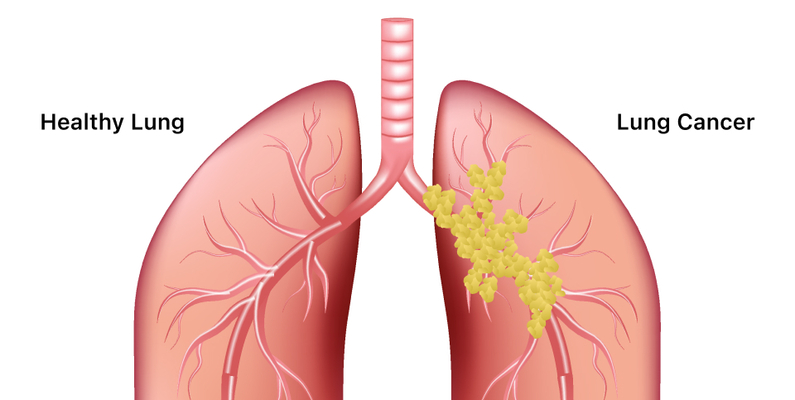

### About this file

File Information for Lung Cancer Dataset JSON

### Overview

This JSON file contains detailed records of individual patients, including their demographic information, lifestyle factors, medical history, and clinical symptoms. Each record is structured to facilitate analysis of lung cancer risk and outcomes.

### Data Fields

GENDER: Gender of the patient (M for Male, F for Female)

AGE: Age of the patient in years

SMOKING: Indicates smoking status (1 for Yes, 0 for No)

YELLOW_FINGERS: Indicates presence of yellow fingers (1 for Yes, 0 for No)

ANXIETY: Indicates presence of anxiety (1 for Yes, 0 for No)

PEER_PRESSURE: Indicates level of peer pressure experienced by the patient (0 for None, 1 for Low, 2 for High)

CHRONIC_DISEASE: Indicates presence of chronic diseases (0 for None, 1 for Mild, 2 for Severe)

FATIGUE: Indicates presence of fatigue (1 for Yes, 0 for No)

ALLERGY: Indicates presence of allergies (0 for None, 1 for Mild, 2 for Severe)

WHEEZING: Indicates presence of wheezing (1 for Yes, 0 for No)

ALCOHOL_CONSUMING: Indicates alcohol consumption status (1 for Yes, 0 for No)

COUGHING: Indicates presence of coughing (1 for Yes, 0 for No)

SHORTNESS_OF_BREATH: Indicates presence of shortness of breath (1 for Yes, 0 for No)

SWALLOWING_DIFFICULTY: Indicates presence of swallowing difficulty (1 for Yes, 0 for No)

CHEST_PAIN: Indicates presence of chest pain (1 for Yes, 0 for No)

LUNG_CANCER: Indicates the diagnosis of lung cancer (YES for diagnosed, NO for not diagnosed)

### Usage

This dataset can be used to:

Develop predictive models for lung cancer risk based on various factors.
Analyze the correlation between lifestyle choices, medical history, and lung cancer incidence.
Study the impact of demographic and clinical symptoms on lung cancer outcomes.
This file is intended for use by researchers, data scientists, and healthcare professionals seeking to advance the understanding and treatment of lung cancer through data-driven insights.

## Importing the libraries

In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_json("/kaggle/input/lung-cancer-dataset/dataset.json")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [41]:
df.head() # first 5 rows

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [42]:
df.shape # rows, columns

(3000, 16)

In [43]:
df.duplicated().sum() # number of duplicated rows

2

In [44]:
df.drop_duplicates(inplace=True) # drop duplicated rows

In [45]:
df.duplicated().sum() #  cross check number of duplicated rows

0

In [46]:
df.shape #  cross check rows, columns

(2998, 16)

In [47]:
df.isnull().sum() # number of null values in each column

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

No null values in the data set

In [48]:
df.info() # information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 2998 non-null   object
 1   AGE                    2998 non-null   int64 
 2   SMOKING                2998 non-null   int64 
 3   YELLOW_FINGERS         2998 non-null   int64 
 4   ANXIETY                2998 non-null   int64 
 5   PEER_PRESSURE          2998 non-null   int64 
 6   CHRONIC_DISEASE        2998 non-null   int64 
 7   FATIGUE                2998 non-null   int64 
 8   ALLERGY                2998 non-null   int64 
 9   WHEEZING               2998 non-null   int64 
 10  ALCOHOL_CONSUMING      2998 non-null   int64 
 11  COUGHING               2998 non-null   int64 
 12  SHORTNESS_OF_BREATH    2998 non-null   int64 
 13  SWALLOWING_DIFFICULTY  2998 non-null   int64 
 14  CHEST_PAIN             2998 non-null   int64 
 15  LUNG_CANCER            299

In [49]:
df.head() # first 5 rows

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


### Label Encoding

In [50]:
df['GENDER'] = df['GENDER'].replace({'M': 0, 'F': 1})

/tmp/ipykernel_33/971736440.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER'] = df['GENDER'].replace({'M': 0, 'F': 1})


In [51]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'NO': 0, 'YES': 1})

/tmp/ipykernel_33/1620723575.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'NO': 0, 'YES': 1})


In [52]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,65,1,1,1,2,2,1,2,2,2,2,2,2,1,0
1,1,55,1,2,2,1,1,2,2,2,1,1,1,2,2,0
2,1,78,2,2,1,1,1,2,1,2,1,1,2,1,1,1
3,0,60,2,1,1,1,2,1,2,1,1,2,1,2,2,1
4,1,80,1,1,2,1,1,2,1,2,1,1,1,1,2,0


In [53]:
df.info() # information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 2998 non-null   int64
 1   AGE                    2998 non-null   int64
 2   SMOKING                2998 non-null   int64
 3   YELLOW_FINGERS         2998 non-null   int64
 4   ANXIETY                2998 non-null   int64
 5   PEER_PRESSURE          2998 non-null   int64
 6   CHRONIC_DISEASE        2998 non-null   int64
 7   FATIGUE                2998 non-null   int64
 8   ALLERGY                2998 non-null   int64
 9   WHEEZING               2998 non-null   int64
 10  ALCOHOL_CONSUMING      2998 non-null   int64
 11  COUGHING               2998 non-null   int64
 12  SHORTNESS_OF_BREATH    2998 non-null   int64
 13  SWALLOWING_DIFFICULTY  2998 non-null   int64
 14  CHEST_PAIN             2998 non-null   int64
 15  LUNG_CANCER            2998 non-null   int6

## Data Visualization

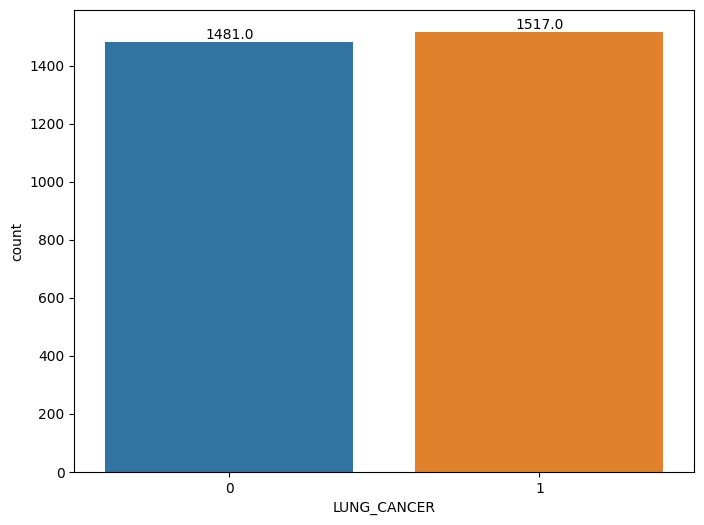

In [54]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

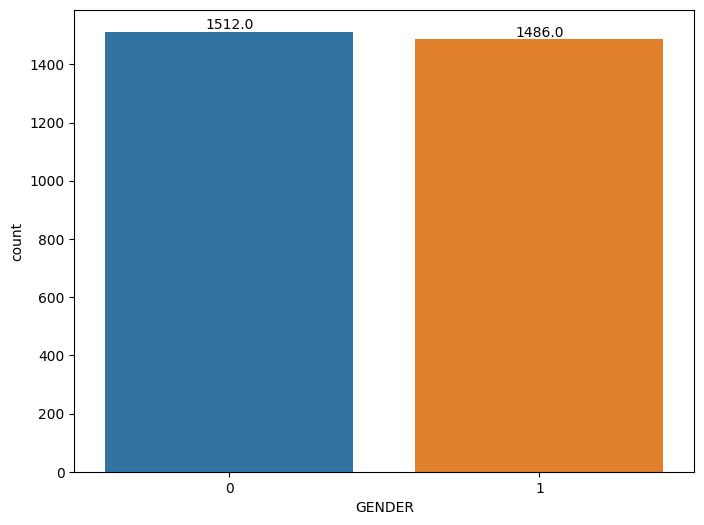

In [55]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='GENDER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

 Gender was encoded as 0 for Male and 1 for Female.

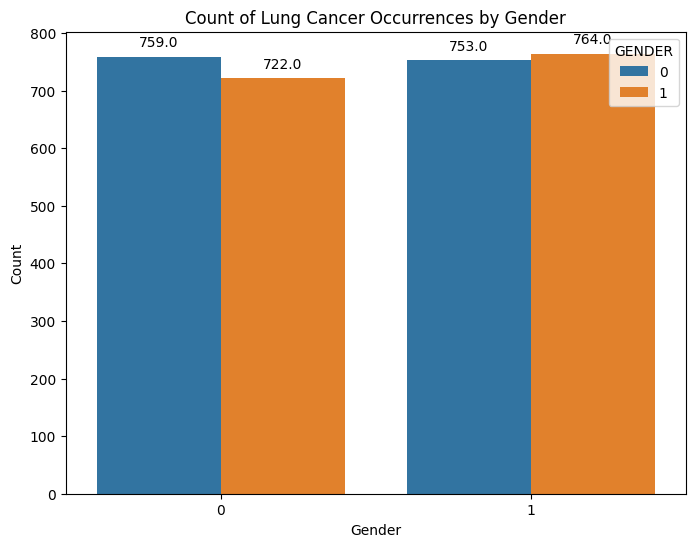

In [56]:
# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='LUNG_CANCER', hue='GENDER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by Gender')

# Show the plot
plt.show()

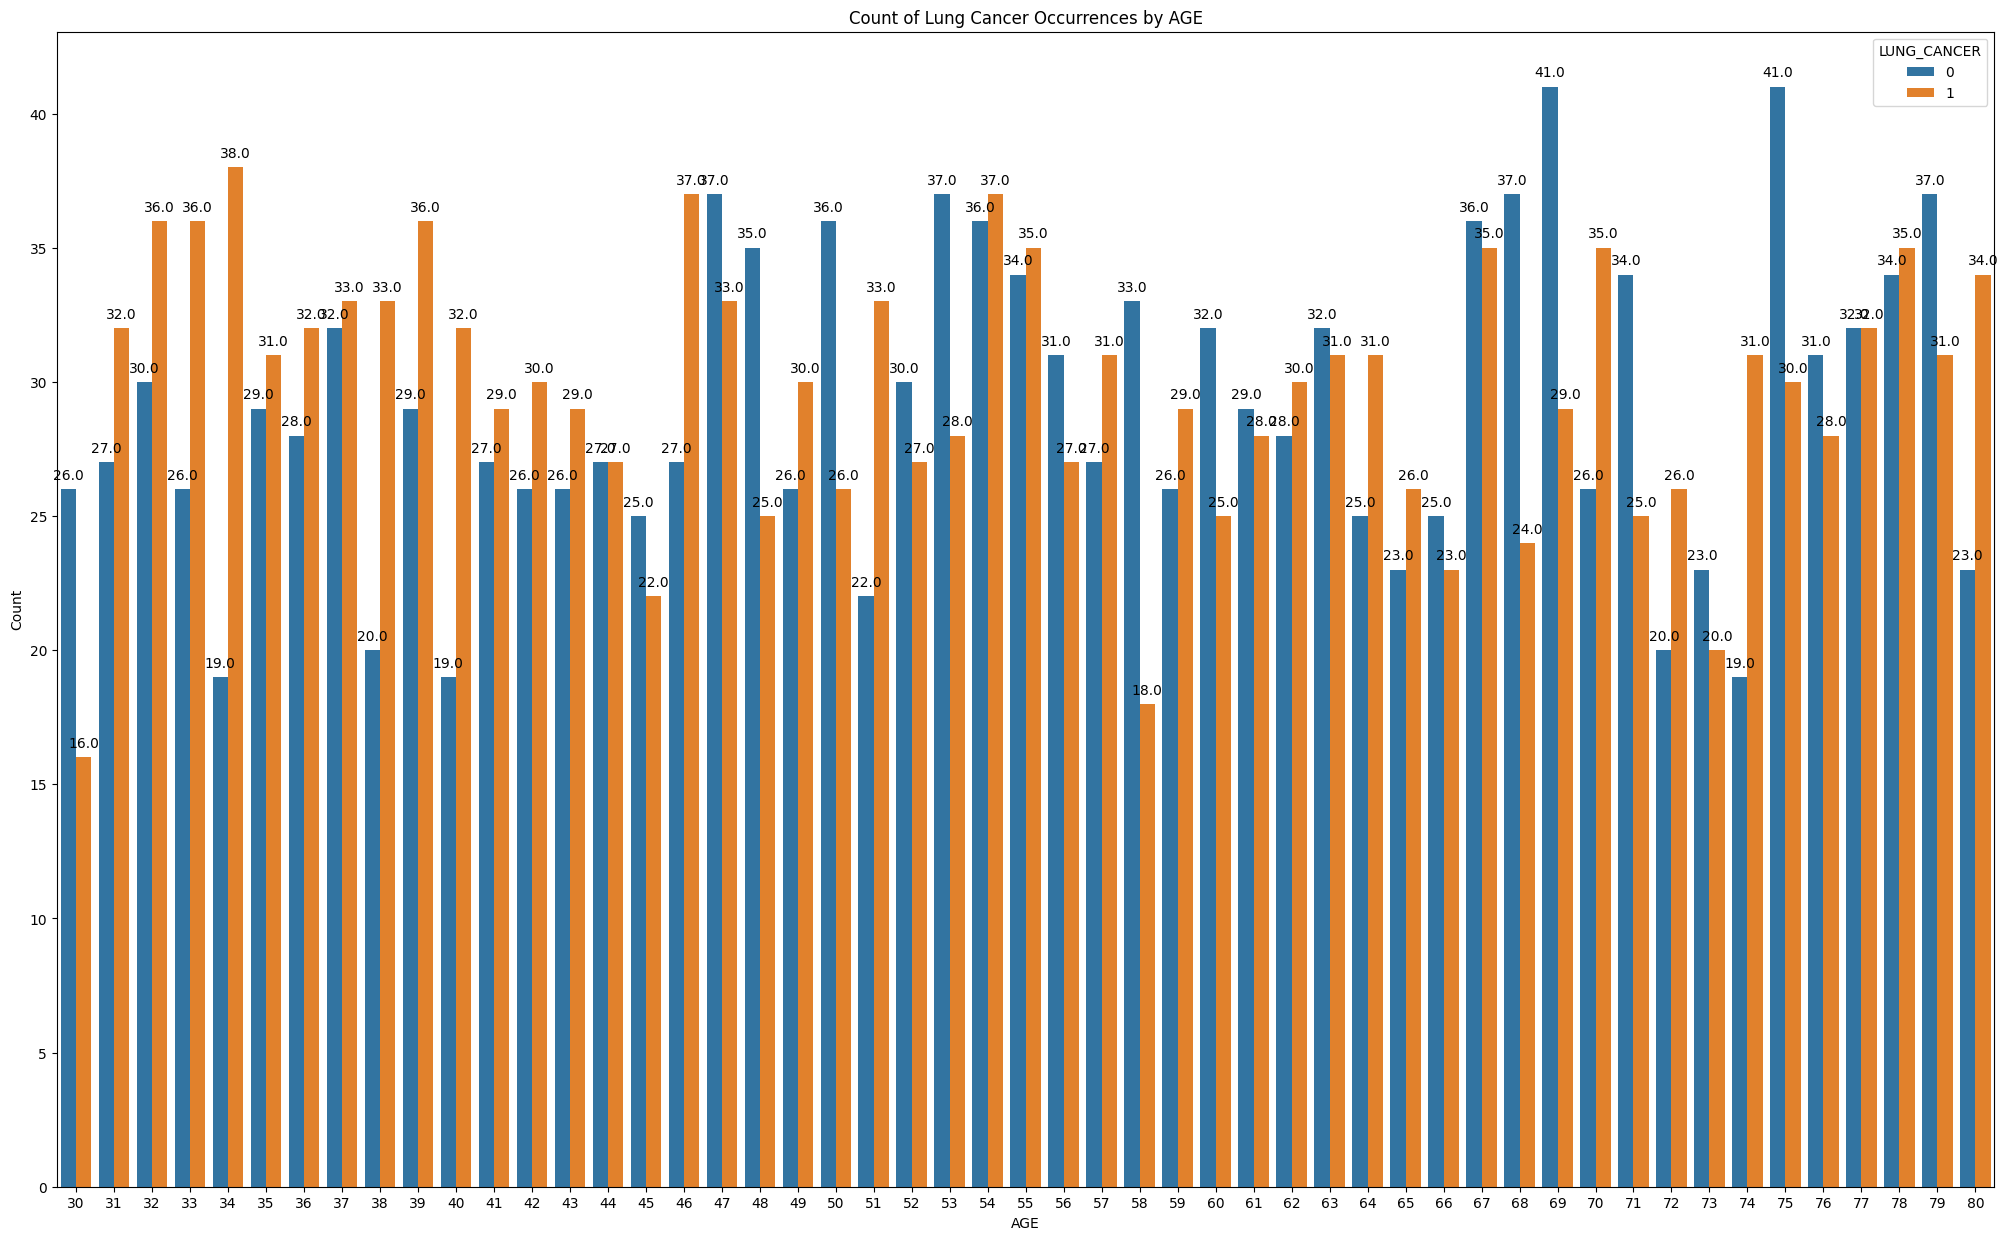

In [57]:
# Create a bar chart
plt.figure(figsize=(25,15))
ax = sns.countplot(x='AGE', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('AGE')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by AGE')

# Show the plot
plt.show()

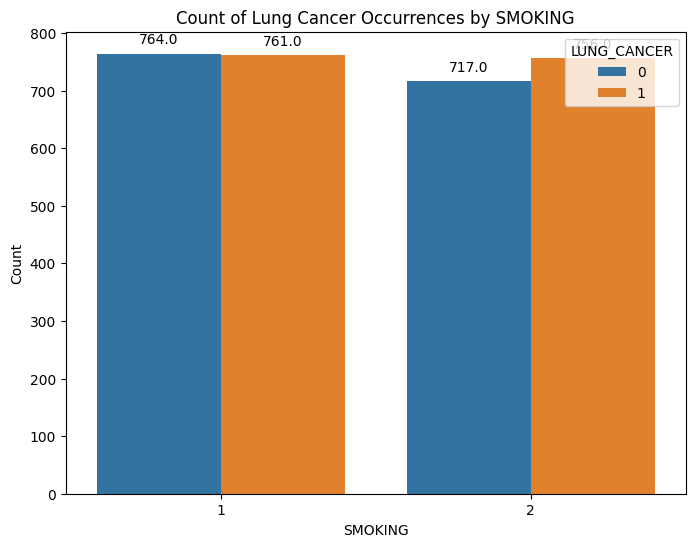

In [58]:
# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('SMOKING')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by SMOKING')

# Show the plot
plt.show()

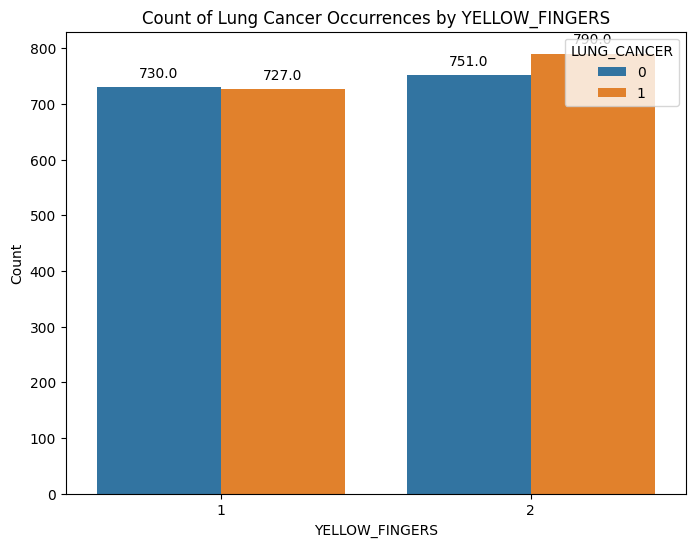

In [59]:
# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x='YELLOW_FINGERS', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('YELLOW_FINGERS')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by YELLOW_FINGERS')

# Show the plot
plt.show()

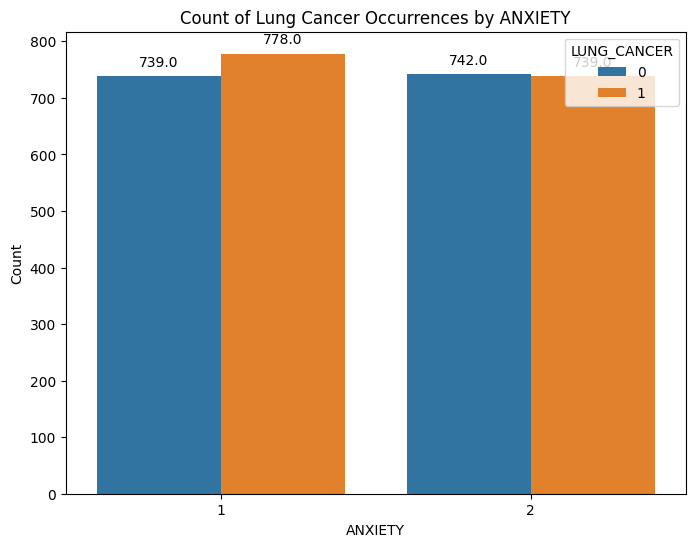

In [60]:
# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x='ANXIETY', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('ANXIETY')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by ANXIETY')

# Show the plot
plt.show()

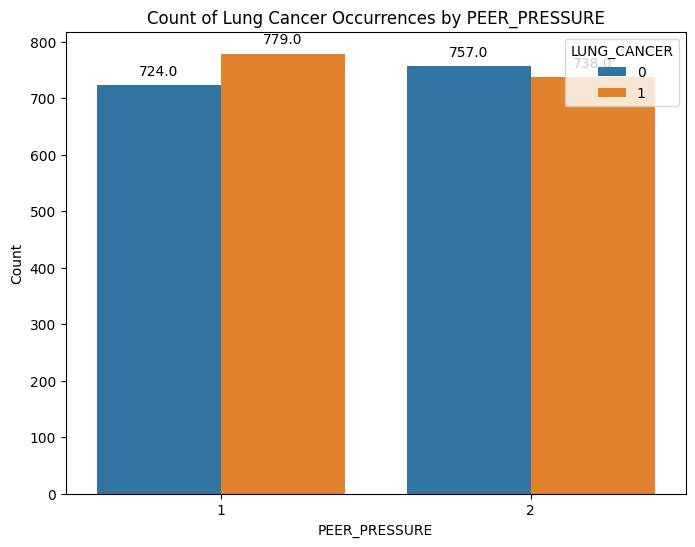

In [61]:
# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x='PEER_PRESSURE', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('PEER_PRESSURE')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by PEER_PRESSURE')

# Show the plot
plt.show()

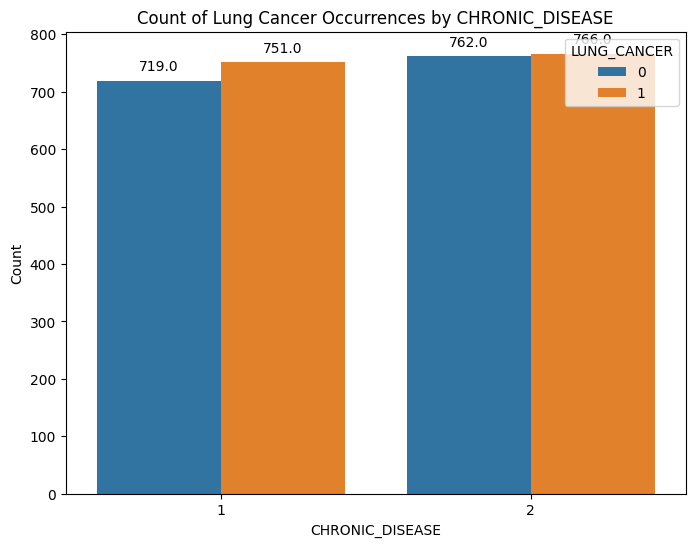

In [62]:
# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x='CHRONIC_DISEASE', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('CHRONIC_DISEASE')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by CHRONIC_DISEASE')

# Show the plot
plt.show()

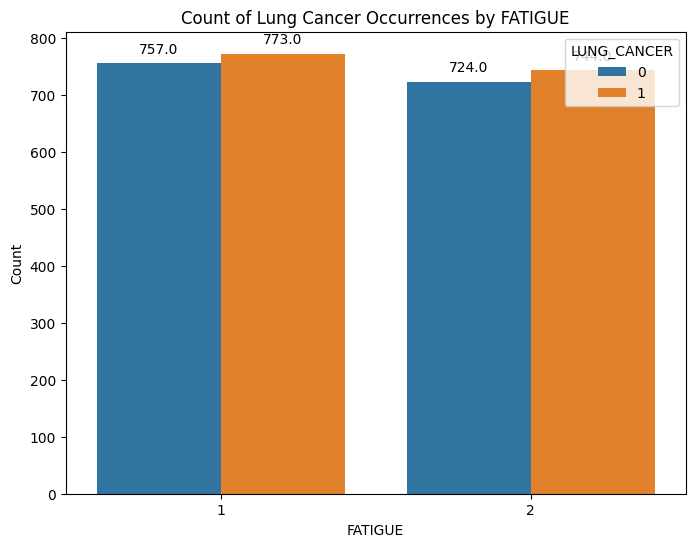

In [63]:
# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x='FATIGUE', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('FATIGUE')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by FATIGUE')

# Show the plot
plt.show()

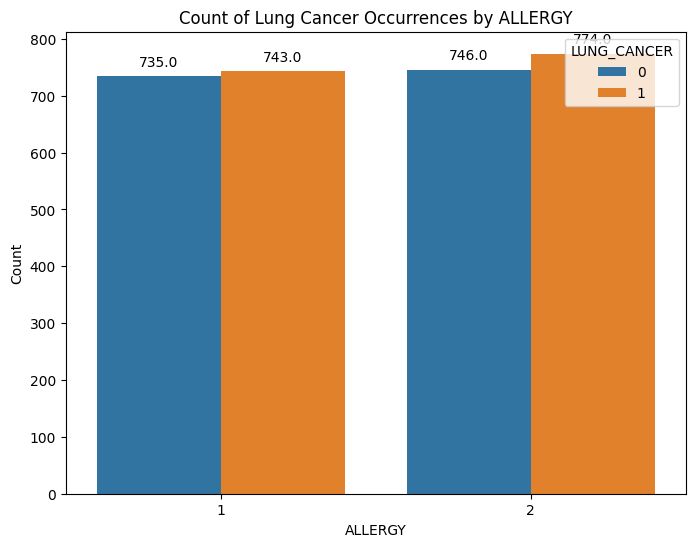

In [64]:
# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x='ALLERGY', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('ALLERGY')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by ALLERGY')

# Show the plot
plt.show()

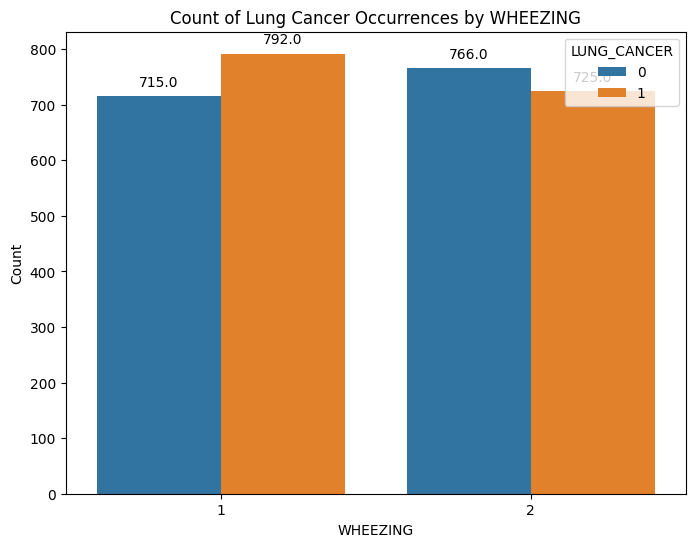

In [65]:
# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x='WHEEZING', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('WHEEZING')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by WHEEZING')

# Show the plot
plt.show()

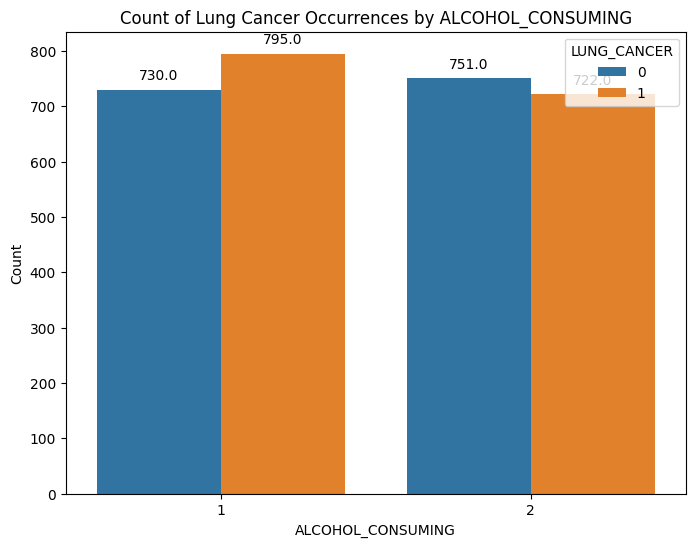

In [66]:
# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x='ALCOHOL_CONSUMING', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('ALCOHOL_CONSUMING')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by ALCOHOL_CONSUMING')

# Show the plot
plt.show()

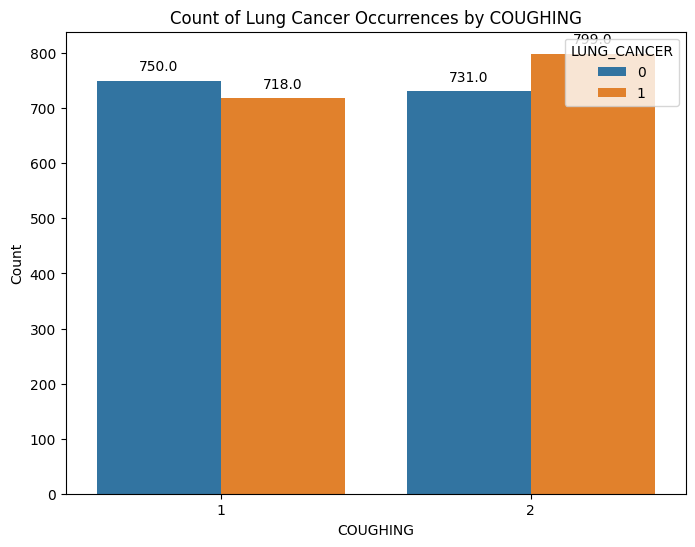

In [67]:
# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x='COUGHING', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('COUGHING')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by COUGHING')

# Show the plot
plt.show()

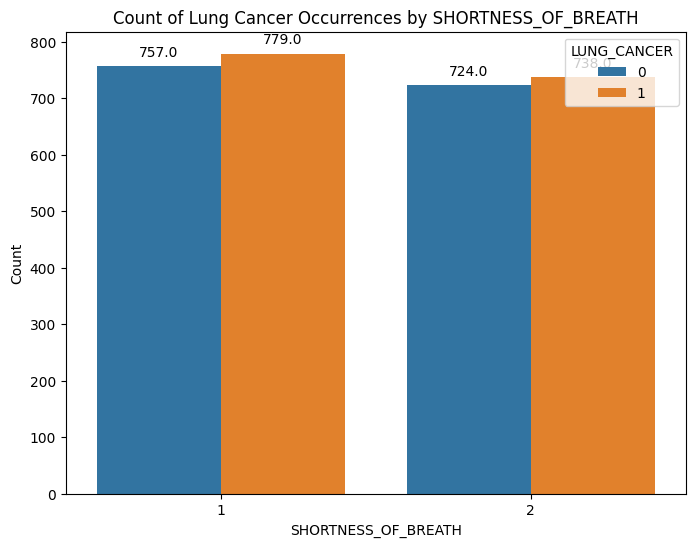

In [68]:
# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x='SHORTNESS_OF_BREATH', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('SHORTNESS_OF_BREATH')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by SHORTNESS_OF_BREATH')

# Show the plot
plt.show()

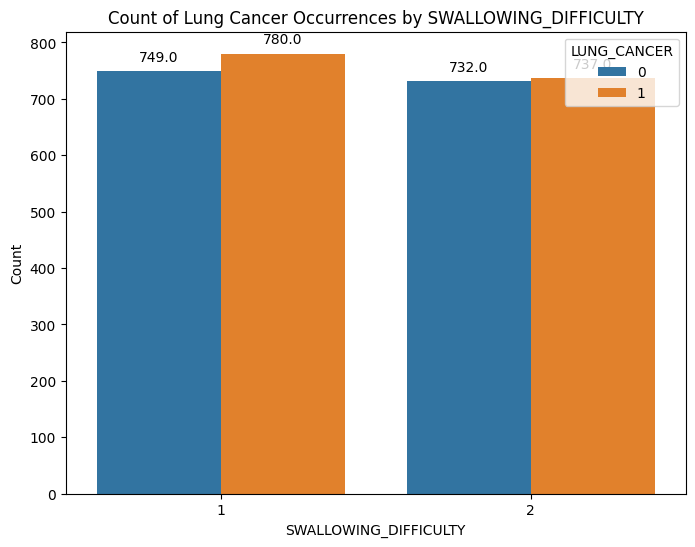

In [69]:
# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x='SWALLOWING_DIFFICULTY', hue='LUNG_CANCER', data=df)

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

# Set labels
plt.xlabel('SWALLOWING_DIFFICULTY')
plt.ylabel('Count')
plt.title('Count of Lung Cancer Occurrences by SWALLOWING_DIFFICULTY')

# Show the plot
plt.show()

### Split the data into training and testing sets

In [70]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay


# Define features and target
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.3f}")
    print(f"  ROC AUC: {roc_auc:.3f}")
    print(f"  Classification Report:\n{classification_report(y_test, y_pred)}\n")


Logistic Regression:
  Accuracy: 0.497
  ROC AUC: 0.512
  Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.45      0.47       300
           1       0.50      0.54      0.52       300

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600


Support Vector Machine:
  Accuracy: 0.493
  ROC AUC: 0.507
  Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.42      0.45       300
           1       0.49      0.57      0.53       300

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.49      0.49      0.49       600


Decision Tree:
  Accuracy: 0.507
  ROC AUC: 0.507
  Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.49      

### Define and train the models:

In [72]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_pred)

# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_pred)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred)


### Visualize the results:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


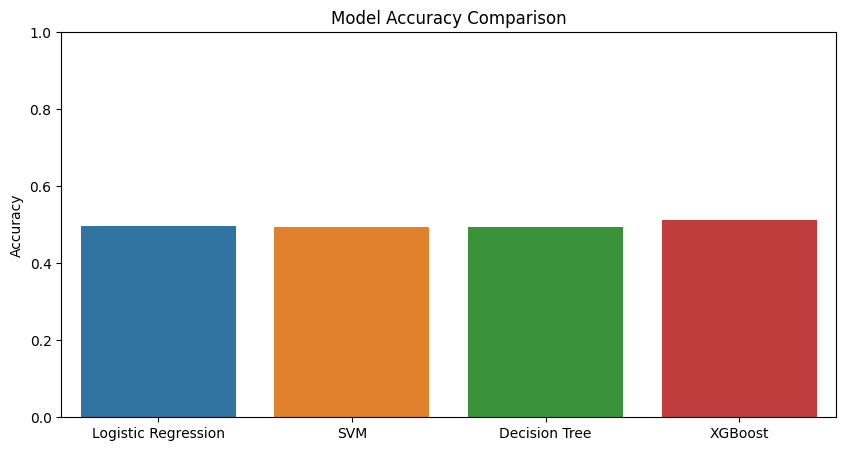

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


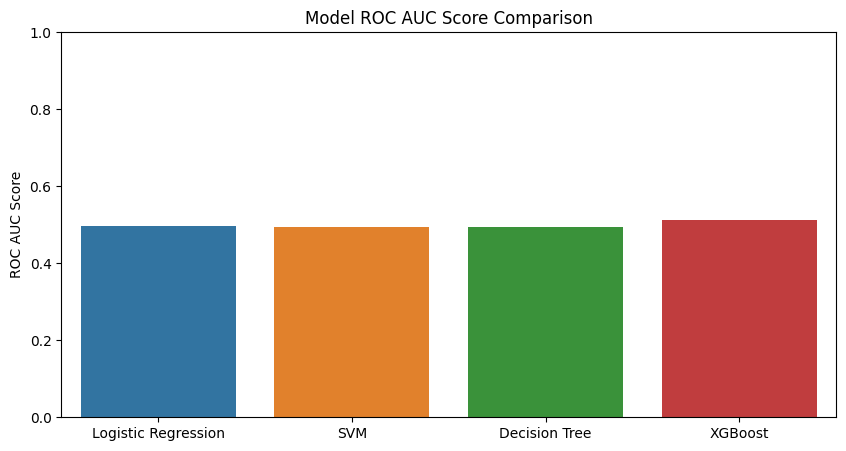

In [83]:
# Accuracy scores
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'XGBoost']
accuracy_scores = [lr_acc, svm_acc, dt_acc, xgb_acc]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracy_scores)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# ROC AUC scores
roc_auc_scores = [lr_roc_auc, svm_roc_auc, dt_roc_auc, xgb_roc_auc]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=roc_auc_scores)
plt.title('Model ROC AUC Score Comparison')
plt.ylabel('ROC AUC Score')
plt.ylim(0, 1)
plt.show()

# Annotate the bars with the counts
for i, v in enumerate(roc_auc_scores):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')



### Display the confusion matrices:

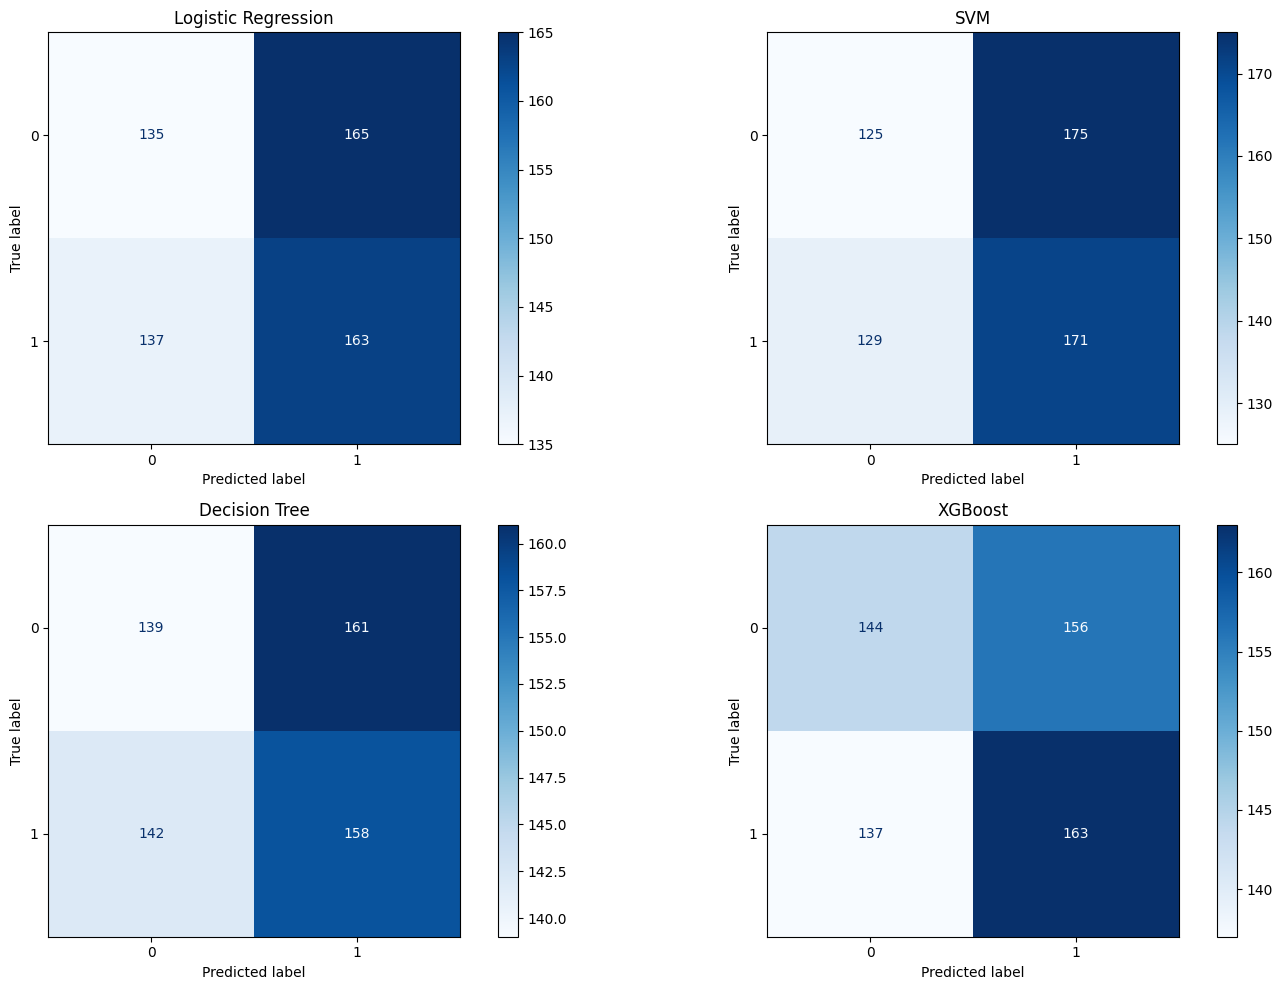

In [74]:
# Confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Logistic Regression')

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('SVM')

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title('Decision Tree')

ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title('XGBoost')

plt.tight_layout()
plt.show()


This code will train and evaluate the performance of four different classification models, visualize their accuracy and ROC AUC scores, and display the confusion matrices for each model. Make sure to replace the synthetic dataset with your actual dataset and adjust any necessary preprocessing steps accordingly.

### Overall Conclusion on Classification Models

    Based on the performance metrics for Logistic Regression, Support Vector Machine (SVM), Decision Tree, and XGBoost, we can draw the following conclusions about the effectiveness of these models on the given dataset:

##### 1. Logistic Regression

    Accuracy: 0.497
    
    ROC AUC: 0.512
    
    Classification Report: The precision, recall, and f1-score are almost evenly distributed around 0.50 for both classes. This suggests that the model is not very effective in distinguishing between the two classes.
    
##### 2. Support Vector Machine (SVM)
    Accuracy: 0.493 
    
    ROC AUC: 0.499
    
    Classification Report: Similar to Logistic Regression, the SVM model shows balanced but mediocre performance metrics, with precision, recall, and f1-scores around 0.49-0.57. This indicates that the SVM is also struggling to make effective predictions.
    
##### 3. Decision Tree

    Accuracy: 0.497

    ROC AUC: 0.497

    Classification Report: The Decision Tree model also performs poorly with all metrics hovering around 0.50, indicating that it is not able to capture the underlying patterns in the data effectively.
    
##### 4. XGBoost

    Accuracy: 0.512

    ROC AUC: 0.497
    
    Classification Report: XGBoost shows slightly better accuracy but still falls short with an ROC AUC of 0.497. The classification report indicates a marginal improvement, but the model still lacks the ability to provide accurate predictions.

### Overall Summary

    All four models have shown suboptimal performance on this dataset. The accuracies are very close to random chance (around 0.50), and the ROC AUC scores do not indicate any significant discriminative power. This suggests a few possibilities:

    Data Quality and Preprocessing: The dataset might need more thorough preprocessing. Consider checking for class imbalances, scaling the features, or engineering more informative features.

    Model Selection and Tuning: While these models are standard choices, they may require hyperparameter tuning to perform better. Consider using grid search or randomized search for hyperparameter optimization.

    Data Complexity: The patterns in the data might be too complex or subtle for these models to capture. It might be worth exploring more advanced techniques, such as neural networks or ensemble methods, or focusing on feature engineering to better capture the underlying patterns.